# Uber Consumption Data Analysis

1. Data Loading and Preparation

In [8]:
import pandas as pd 
#Read in the dataset of july uber pickups
uber_data = pd.read_csv("/Users/satyamchauhan/Documents/Python /Projects/archive/uber-raw-data-jul14.csv")

In [14]:
#Convert the type of the column to datetime
uber_data["Date/Time"] = pd.to_datetime(uber_data["Date/Time"])
#Using a floor can round off the date-time into discrete increments
uber_data["Date/Time"].dt.floor('1H')
#number of trips at given times
hourly_data = uber_data["Date/Time"].dt.floor("1H").value_counts()
hourly_data = hourly_data.sort_index()
#sort the data
hourly_data = uber_data["Date/Time"].dt.floor('1H').value_counts()
hourly_data = hourly_data.sort_index()
#average number of trips for each hour/week day combination
hours = uber_data["Date/Time"].dt.hour
week_day = uber_data["Date/Time"].dt.weekday
date = uber_data["Date/Time"].dt.date
weekly_data = pd.concat([week_day, hours, date], axis=1)
weekly_data.columns = ["Week Day","Hours","Date"]
#To map the integer version of calendar to actual name
import calendar
#Mapping the name
weekly_data["Week Day"] = weekly_data["Week Day"].apply(lambda x: calendar.day_name[x])
#Aggregating the number of rides based on each date
weekly_data =weekly_data.groupby(["Date","Week Day","Hours"]).size()
#Index reset 
weekly_data =weekly_data.reset_index()
#Rename 0, the default column name to be size
weekly_data =weekly_data.rename(columns={0:"Size"})
#Now we can group by the week day and average to get the mean for each week day/hour
weekly_data = weekly_data.groupby(["Week Day","Hours"]).mean()["Size"]
#avg rides for the intersection of hours and week
weekly_data =weekly_data.unstack(level=0)
#re-index to arrange days chronologically 
weekly_data = weekly_data.reindex(columns=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
weekly_data

Week Day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Hours,,,,,,,
0,315.00,301.8,354.6,430.0,615.00,1110.25,1090.00
1,153.25,155.8,193.2,231.4,385.25,788.25,829.50
2,109.75,111.2,156.0,171.0,264.75,580.00,638.25
3,254.75,187.0,224.0,256.6,307.50,426.00,477.00
4,403.75,296.6,326.0,376.8,339.75,271.75,245.50
5,615.25,546.0,559.8,586.2,497.25,274.25,231.25
6,911.00,962.2,1003.4,959.2,736.75,303.50,256.75
7,1266.50,1350.0,1425.8,1341.8,1008.00,398.50,316.25
8,1199.25,1332.4,1425.0,1336.6,1038.00,525.25,466.75


2. Data Visualization

2.a Heatmap

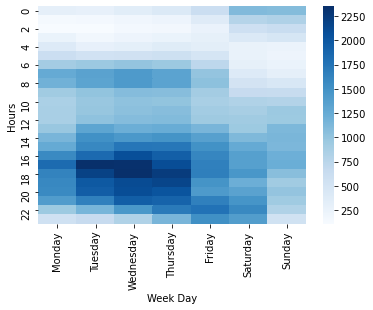

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(weekly_data, cmap='Blues')
plt.show()

2.b Barplot

<AxesSubplot:xlabel='Week Day'>

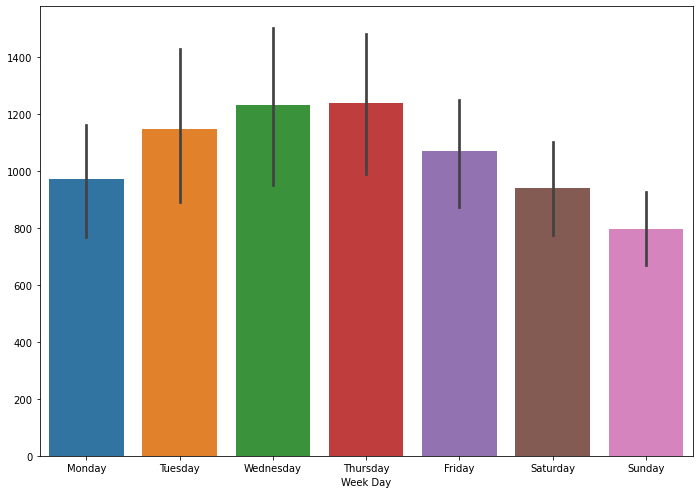

In [20]:
from matplotlib import pyplot
import seaborn as sns
a4_dims = (11.7, 8.27)
plt.show()
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(ax=ax, data = weekly_data)

2.c Hourly Trend

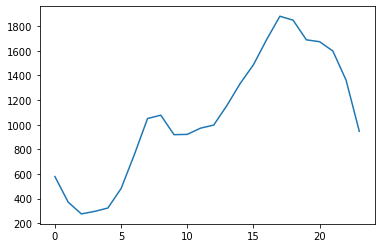

In [52]:
#Hourly trends
h = hourly_data.groupby(hourly_data.index.hour).mean()
h.plot(kind="line")
plt.show()

2.d Weekdays vs Weekend Trends

In [22]:
#weekdays vs weekends trends
#We will index with i for weekdays
i = hourly_data.index.weekday <= 4

h_week = hourly_data.loc[i].groupby(hourly_data.loc[i].index.hour).mean()
h_weekend = hourly_data.loc[~i].groupby(hourly_data.loc[~i].index.hour).mean()
h = pd.concat([h_week, h_weekend], axis=1)
h.columns = ["Weekday", "Weekend"]


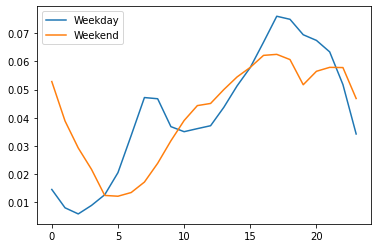

In [23]:
#Plotting the difference
(h / h.sum()).plot(kind='line')
plt.show()

3. Distance Measurement

In [25]:
import geopy.distance

In [31]:
#Adding coordinates of the point of interests and calculating the distance between them 

mcd_coordinates = (40.709438, -74.010086)
bk_coordinates = (40.758023, -73.99093)
distance = geopy.distance.distance(mcd_coordinates, bk_coordinates)
print(distance)
print(distance.mi)

5.632739650788227 km
3.5000221523727846


In [32]:
#convert our latitude and longitude columns to tuples
uber_data[["Lat","Lon"]].apply(lambda x: tuple(x), axis=1)

0         (40.7586, -73.9706)
1         (40.7605, -73.9994)
2          (40.732, -73.9999)
3         (40.7635, -73.9793)
4         (40.7204, -74.0047)
                 ...         
796116    (40.7285, -73.9846)
796117    (40.7615, -73.9868)
796118     (40.677, -73.9515)
796119    (40.7225, -74.0038)
796120    (40.7199, -73.9884)
Length: 796121, dtype: object

In [33]:
#haversine formula 

from math import radians, cos, sin, asin, sqrt
def haversine(coordinates1, coordinates2):
    lon1 = coordinates1[1]
    lat1 = coordinates1[0]
    lon2 = coordinates2[1]
    lat2 = coordinates2[0]
    #Change to radians 
    lon1, lat1, lon2, lat2, = map(radians, [lon1, lat1, lon2, lat2])
    
    #apply haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2*asin(sqrt(a))
    r = 3956
    return c*r
print(haversine(mcd_coordinates,bk_coordinates))

3.5010769538462485


In [35]:
#now, we can find the distance between drop offs and point of interests. 
uber_data["Distance MCD"] = uber_data[["Lat","Lon"]].apply(lambda x: haversine(mcd_coordinates, tuple(x)),axis =1)
uber_data["Distance BK"] = uber_data[["Lat","Lon"]].apply(lambda x: haversine(bk_coordinates, tuple(x)),axis =1)

Calculating the Distance

1. We can find the distance between drop offs and point of interests
2. This will help us to figure out if there is a chance that the rider is going to either one of the point of interest or may be none 

In [36]:
#summarize the data
print(uber_data[["Distance MCD", "Distance BK"]].describe())

        Distance MCD    Distance BK
count  796121.000000  796121.000000
mean        3.832182       2.960025
std         3.268251       3.337366
min         0.006518       0.002232
25%         1.997632       1.046191
50%         3.208040       2.008874
75%         4.401977       3.454955
max        89.833860      88.377477


In [29]:
print((uber_data[["Distance MCD", "Distance BK"]] < .25).sum())

Distance MCD    10378
Distance BK     12145
dtype: int64


This tells us that the number of rides from Burger King is much higher than McDonalds

In [37]:
#Creating bins of radius and see how many rides fall within it
import numpy as np
distance_range = np.arange(.1,5.1,.1)
print(distance_range)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6
 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5. ]


In [39]:
#run our analysis for each distance to identify number of riders in each radius  
distance_data = [(uber_data[["Distance MCD", "Distance BK"]] < dist).sum() for dist in distance_range]
#concat 
distance_data = pd.concat(distance_data, axis=1)
#transpose and add in the index 
distance_data = distance_data.transpose()
distance_data.index = distance_range
print(distance_data)

     Distance MCD  Distance BK
0.1          1944         2102
0.2          6522         8565
0.3         14499        17802
0.4         24232        29942
0.5         33444        50585
0.6         39172        69644
0.7         44124        92590
0.8         50189       117336
0.9         56143       148864
1.0         65509       184706
1.1         75051       212346
1.2         89649       238325
1.3        103883       263685
1.4        117181       287187
1.5        131540       309491
1.6        144079       326359
1.7        156263       343302
1.8        171610       360309
1.9        185637       378272
2.0        199410       396464
2.1        214539       414220
2.2        232693       431733
2.3        249621       450619
2.4        267337       471198
2.5        284895       490113
2.6        300550       509801
2.7        316433       526167
2.8        331345       539226
2.9        347297       549564
3.0        365527       556845
3.1        381958       567363
3.2     

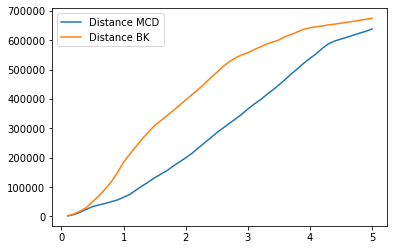

In [40]:
#plot
distance_data.plot(kind="line")
plt.show()

While the BK has larger amounts of rider but as we increase the radius MCD starts to get more riders 

4. Geospatial Mapping

In [41]:
#mapping the tri-state geographical area
import folium as folium 
uber_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
uber_map

In [43]:
from folium.plugins import HeatMap

lat_lon = uber_data[["Lat", "Lon"]].values[:10000]
uber_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
HeatMap(lat_lon, radius=13).add_to(uber_map)
uber_map

We zoom in to see specific areas that have higher density of rides

In [44]:
i = uber_data[["Distance MCD", "Distance BK"]] < .25
print(i)

        Distance MCD  Distance BK
0              False        False
1              False        False
2              False        False
3              False        False
4              False        False
...              ...          ...
796116         False        False
796117         False        False
796118         False        False
796119         False        False
796120         False        False

[796121 rows x 2 columns]


In [45]:
i = i.any(axis = 1)
map_data = uber_data[i].copy()
print(map_data)

                 Date/Time      Lat      Lon    Base  Distance MCD  \
51     2014-07-01 06:33:00  40.7567 -73.9926  B02512      3.389033   
69     2014-07-01 06:58:00  40.7562 -73.9913  B02512      3.374983   
179    2014-07-01 09:20:00  40.7582 -73.9871  B02512      3.575120   
180    2014-07-01 09:20:00  40.7582 -73.9871  B02512      3.575120   
204    2014-07-01 09:55:00  40.7605 -73.9912  B02512      3.661429   
...                    ...      ...      ...     ...           ...   
795821 2014-07-31 09:58:00  40.7577 -73.9895  B02764      3.501997   
795895 2014-07-31 14:48:00  40.7130 -74.0096  B02764      0.247251   
795901 2014-07-31 15:04:00  40.7564 -73.9871  B02764      3.458340   
795979 2014-07-31 17:39:00  40.7116 -74.0078  B02764      0.191305   
796037 2014-07-31 19:35:00  40.7112 -74.0065  B02764      0.223663   

        Distance BK  
51         0.126384  
69         0.127348  
179        0.200681  
180        0.200681  
204        0.171607  
...             ...  
79582

In [46]:
from folium.plugins import HeatMap
map_data["Weight"]= .1
lat_lon = map_data[["Lat","Lon","Weight"]].values
uber_map = folium.Map(location=[40.7728, -74.0060], zoom_start=13)
HeatMap(lat_lon, radius=10).add_to(uber_map)
uber_map

Burger King has more activity compared to McDonalds

In [49]:
# change minutes and seconds to zero 
uber_data["Date_Hour"] = uber_data["Date/Time"].apply(lambda x: x.replace(microsecond=0, second=0,minute=0))
from datetime import datetime
map_data = uber_data[uber_data["Date/Time"] < datetime(2014,7,8)].copy()
map_data["Weight"] = .5
#Randomly sample 1/3 the values in each group
map_data = map_data.groupby('Date_Hour').apply(lambda x: x[["Lat", "Lon", "Weight"]].sample(int(len(x)/3)).values.tolist())
#Get the index
date_hour_index = [x.strftime("%m/%d/%Y, %H:%M:%S") for x in map_data.index]
#Each element of the bigger list is a for a date/hour combo
date_hour_data = map_data.tolist()
from folium.plugins import HeatMapWithTime
uber_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)


In [50]:
#Plotting time - series heat map
hm = HeatMapWithTime(date_hour_data, index= date_hour_index)
hm.add_to(uber_map)
uber_map